A telecommunications provider has segmented its customer base by service usage patterns and vategorized the customers into four groups. In this project, I develope a KNN classifier model to predict class of each case.

The features in the data set contains region, tenure, age, and marital, to predict usage patterns.

The target or label is called custcat has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [52]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [53]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### Visualized Data

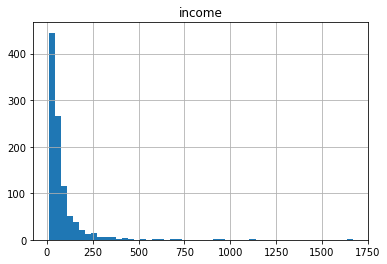

In [54]:
df.hist(column='income', bins=50)
plt.show()

In [55]:
features=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']]

labels = df['custcat']

### Normalized Data

In [56]:
features = StandardScaler().fit(features).transform(features.astype(float))

#to data frame if necessory:
#features=pd.DataFrame(features, columns=df.columns[:-1])

### Train Test Split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


## Model KNN Tuning: find the best K: Error Rate

Minimum error:- 0.6 at K = 14


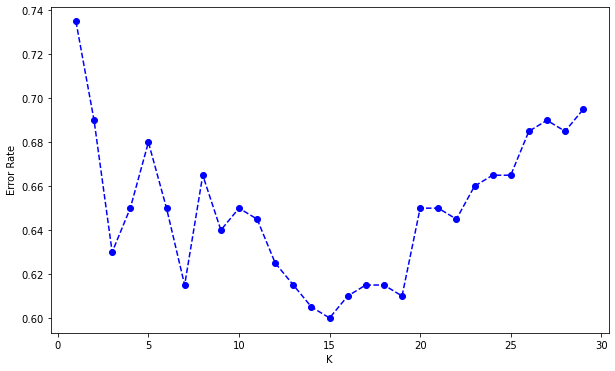

In [58]:
error_rate=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test.values.ravel()))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', ls='--', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [59]:
'''KNN'''
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.values.ravel())  #column vactor to array

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
#Predict Output
y_pred_tr= knn.predict(X_train)
y_pred_te= knn.predict(X_test)


In [61]:
print("Accuracy for Train: ", metrics.accuracy_score(y_train, y_pred_tr))
print("Accuracy for Test: ", metrics.accuracy_score(y_test, y_pred_te))
print('confusion:', confusion_matrix(y_test, y_pred_te))
print('class record:', classification_report(y_test, y_pred_te))

Accuracy for Train:  0.5866666666666667
Accuracy for Test:  0.37
confusion: [[30 12  8  7]
 [22  9  8  8]
 [18 14 20  7]
 [13  7  2 15]]
class record:               precision    recall  f1-score   support

           1       0.36      0.53      0.43        57
           2       0.21      0.19      0.20        47
           3       0.53      0.34      0.41        59
           4       0.41      0.41      0.41        37

    accuracy                           0.37       200
   macro avg       0.38      0.37      0.36       200
weighted avg       0.38      0.37      0.37       200



## Model Tuning using Accuracy

In [62]:
'''Check for various value of K'''

Ks = 40
mean_acc = np.zeros((Ks - 1))
std_acc  = np.zeros((Ks - 1))

for n in range(1, Ks):
    
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_pred_te = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, y_pred_te)
    std_acc [n - 1] = np.std(y_pred_te == y_test) / np.sqrt(y_pred_te.shape[0])
    



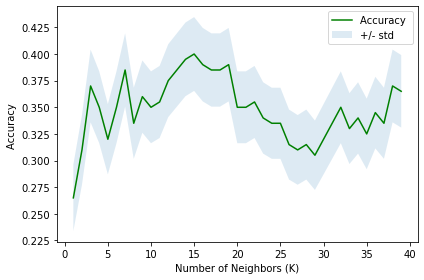

In [63]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc-std_acc, mean_acc+std_acc, alpha=0.15)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [64]:
mean_acc

array([0.265, 0.31 , 0.37 , 0.35 , 0.32 , 0.35 , 0.385, 0.335, 0.36 ,
       0.35 , 0.355, 0.375, 0.385, 0.395, 0.4  , 0.39 , 0.385, 0.385,
       0.39 , 0.35 , 0.35 , 0.355, 0.34 , 0.335, 0.335, 0.315, 0.31 ,
       0.315, 0.305, 0.32 , 0.335, 0.35 , 0.33 , 0.34 , 0.325, 0.345,
       0.335, 0.37 , 0.365])

In [65]:
std_acc

array([0.03120697, 0.03270321, 0.03413942, 0.03372684, 0.03298485,
       0.03372684, 0.03440748, 0.03337477, 0.03394113, 0.03372684,
       0.033836  , 0.03423266, 0.03440748, 0.03456696, 0.03464102,
       0.03448913, 0.03440748, 0.03440748, 0.03448913, 0.03372684,
       0.03372684, 0.033836  , 0.03349627, 0.03337477, 0.03337477,
       0.03284623, 0.03270321, 0.03284623, 0.03255572, 0.03298485,
       0.03337477, 0.03372684, 0.03324906, 0.03349627, 0.0331191 ,
       0.03361361, 0.03337477, 0.03413942, 0.03404225])

In [66]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was 0.4 with k= 15
